In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [76]:
df = pd.read_csv("out.csv")
formats = list(df['Formato'].unique())
colors = dict(zip(formats, ['b', 'r']))
plt.figure(figsize=(10, 6))
df

,Arquivo,Formato,Tamanho original (bits),Tamanho comprimido (bits),Tamanho Dicionário,Qtd de bits por código,Taxa de compressão,Tempo de compressão (ms),Tempo Relativo (ms/kB)
0,ex (1).txt,ascii,144,144,271,9,1.000000,0.395298,22.488064
1,ex (1).txt,ascii,144,144,271,9,1.000000,0.317097,18.039280
2,ex (1).txt,ascii,144,144,271,9,1.000000,0.316381,17.998589
3,ex (1).txt,ascii,144,144,271,9,1.000000,0.292301,16.628689
4,ex (1).txt,ascii,144,144,271,9,1.000000,0.294685,16.764323
...,...,...,...,...,...,...,...,...,...
95,ex (5).txt,binary,187064,187894,13422,14,0.995583,1168.206930,51.158701
96,ex (5).txt,binary,187064,187894,13422,14,0.995583,1194.681883,52.318105
97,ex (5).txt,binary,187064,187894,13422,14,0.995583,1165.160179,51.025276
98,ex (5).txt,binary,187064,187894,13422,14,0.995583,1198.120117,52.468674


<Figure size 1000x600 with 0 Axes>

In [77]:
df1 = df.groupby(['Arquivo', 'Formato']).agg({
    'Tamanho original (bits)': 'mean',
    'Tamanho comprimido (bits)': 'mean',
    'Tamanho Dicionário': 'mean',
    'Qtd de bits por código': 'mean',
    'Taxa de compressão': 'mean',
    'Tempo de compressão (ms)': 'mean',
    'Tempo Relativo (ms/kB)': 'mean'})
df1.reset_index(inplace=True)
df1

,Arquivo,Formato,Tamanho original (bits),Tamanho comprimido (bits),Tamanho Dicionário,Qtd de bits por código,Taxa de compressão,Tempo de compressão (ms),Tempo Relativo (ms/kB)
0,ex (1).txt,ascii,144.0,144.0,271.0,9.0,1.000000,0.325227,18.501790
1,ex (1).txt,binary,144.0,252.0,43.0,6.0,0.571429,0.512409,29.150391
2,ex (2).txt,ascii,93944.0,36336.0,3283.0,12.0,2.585425,50.501180,4.403748
3,ex (2).txt,binary,93944.0,87321.0,6718.0,13.0,1.075847,681.423497,59.420732
4,ex (3).txt,ascii,71768.0,40092.0,3596.0,12.0,1.790083,34.221435,3.906226
5,ex (3).txt,binary,71768.0,77142.0,5935.0,13.0,0.930336,410.741973,46.884381
6,ex (4).txt,ascii,16416.0,1377.0,408.0,9.0,11.921569,14.004636,6.988668
7,ex (4).txt,binary,16416.0,11330.0,1031.0,11.0,1.448897,120.491099,60.128112
8,ex (5).txt,ascii,187064.0,100087.0,7954.0,13.0,1.869014,91.212893,3.994440
9,ex (5).txt,binary,187064.0,187894.0,13422.0,14.0,0.995583,1174.041057,51.414192


In [78]:
df1 = df1.groupby(['Formato'])

In [79]:
df1.get_group((formats[0],))

,Arquivo,Formato,Tamanho original (bits),Tamanho comprimido (bits),Tamanho Dicionário,Qtd de bits por código,Taxa de compressão,Tempo de compressão (ms),Tempo Relativo (ms/kB)
0,ex (1).txt,ascii,144.0,144.0,271.0,9.0,1.000000,0.325227,18.501790
2,ex (2).txt,ascii,93944.0,36336.0,3283.0,12.0,2.585425,50.501180,4.403748
4,ex (3).txt,ascii,71768.0,40092.0,3596.0,12.0,1.790083,34.221435,3.906226
6,ex (4).txt,ascii,16416.0,1377.0,408.0,9.0,11.921569,14.004636,6.988668
8,ex (5).txt,ascii,187064.0,100087.0,7954.0,13.0,1.869014,91.212893,3.994440


In [80]:
df1.get_group((formats[1],))

,Arquivo,Formato,Tamanho original (bits),Tamanho comprimido (bits),Tamanho Dicionário,Qtd de bits por código,Taxa de compressão,Tempo de compressão (ms),Tempo Relativo (ms/kB)
1,ex (1).txt,binary,144.0,252.0,43.0,6.0,0.571429,0.512409,29.150391
3,ex (2).txt,binary,93944.0,87321.0,6718.0,13.0,1.075847,681.423497,59.420732
5,ex (3).txt,binary,71768.0,77142.0,5935.0,13.0,0.930336,410.741973,46.884381
7,ex (4).txt,binary,16416.0,11330.0,1031.0,11.0,1.448897,120.491099,60.128112
9,ex (5).txt,binary,187064.0,187894.0,13422.0,14.0,0.995583,1174.041057,51.414192


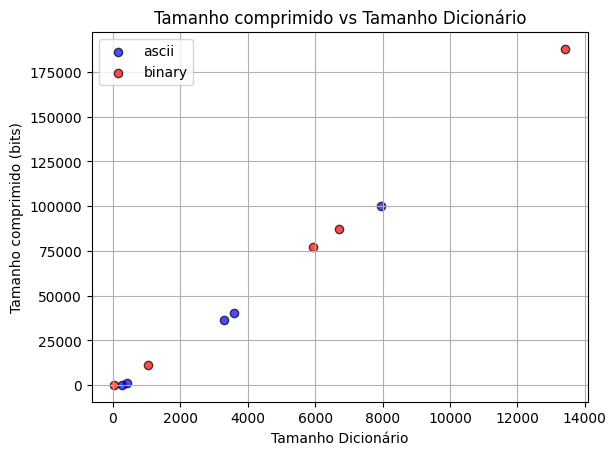

In [81]:
for format in formats:
    plt.scatter(df1.get_group((format,))['Tamanho Dicionário'],
                df1.get_group((format,))['Tamanho comprimido (bits)'],
                label=format,
                color=colors[format],
                alpha=0.7, edgecolors='k',
                )
plt.grid(True)
plt.legend(formats)
plt.xlabel('Tamanho Dicionário')
plt.ylabel('Tamanho comprimido (bits)')
plt.title('Tamanho comprimido vs Tamanho Dicionário')
plt.show()

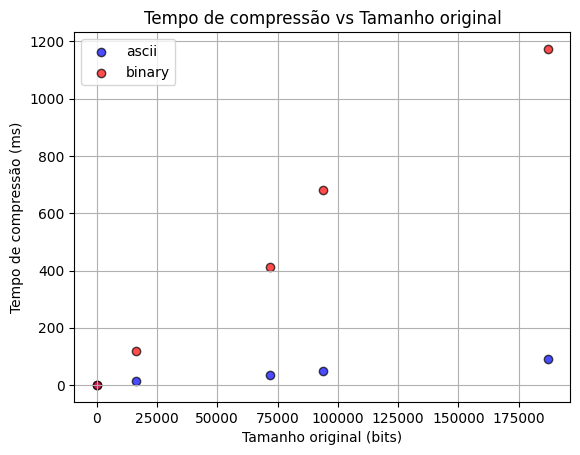

In [82]:
for format in formats:
    plt.scatter(df1.get_group((format,))['Tamanho original (bits)'],
                df1.get_group((format,))['Tempo de compressão (ms)'],
                label=format,
                color=colors[format],
                alpha=0.7, edgecolors='k',
                )
plt.grid(True)
plt.legend(formats)
plt.xlabel('Tamanho original (bits)')
plt.ylabel('Tempo de compressão (ms)')
plt.title('Tempo de compressão vs Tamanho original')
plt.show()

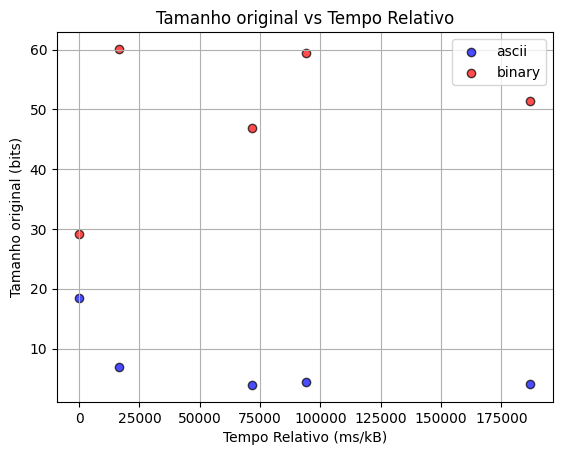

In [83]:
for format in formats:
    plt.scatter(df1.get_group((format,))['Tamanho original (bits)'],
                df1.get_group((format,))['Tempo Relativo (ms/kB)'],
                label=format,
                color=colors[format],
                alpha=0.7, edgecolors='k',
    )
plt.grid(True)
plt.legend(formats)
plt.xlabel('Tempo Relativo (ms/kB)')
plt.ylabel('Tamanho original (bits)')
plt.title('Tamanho original vs Tempo Relativo')
plt.show()

In [90]:
def compress_time(df, file, format):
    return df.loc[(df['Arquivo'] == file) & (df['Formato'] == format), 'Tempo de compressão (ms)'].values

In [102]:
x, y, z = len(df['Arquivo'].unique()), len(formats), 10

tempos = np.ndarray(shape=(x, y, z))
for i, file in enumerate(df['Arquivo'].unique()):
    for j, format in enumerate(formats):
        tempos[i, j] = compress_time(df, file, format)

tempos

array([[[3.95298004e-01, 3.17096710e-01, 3.16381454e-01, 2.92301178e-01,
         2.94685364e-01, 2.97546387e-01, 3.40700150e-01, 2.97784805e-01,
         3.95059586e-01, 3.05414200e-01],
        [4.75645065e-01, 4.91380692e-01, 5.03540039e-01, 4.88042831e-01,
         4.84704971e-01, 4.94003296e-01, 6.60896301e-01, 4.91857529e-01,
         4.86373901e-01, 5.47647476e-01]],

       [[4.79679108e+01, 4.74872589e+01, 4.76679802e+01, 4.92620468e+01,
         4.84898090e+01, 4.99091148e+01, 4.85136509e+01, 4.96759415e+01,
         6.82082176e+01, 4.78298664e+01],
        [6.75774336e+02, 6.84462070e+02, 6.88718319e+02, 7.05850840e+02,
         6.78509235e+02, 6.70649290e+02, 6.69434309e+02, 6.69440508e+02,
         6.92834377e+02, 6.78561687e+02]],

       [[3.17125320e+01, 3.21254730e+01, 3.18782330e+01, 3.34992409e+01,
         3.14748287e+01, 3.14095020e+01, 5.25410175e+01, 3.24265957e+01,
         3.27358246e+01, 3.24110985e+01],
        [4.01646376e+02, 4.00447369e+02, 4.04998302e+02,